In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [11]:
wq = pd.read_csv("Datasets/water_quality_training_dataset.csv")
landsat = pd.read_csv("Datasets/landsat_features_training.csv")
terraclimate = pd.read_csv("Datasets/terraclimate_features_training.csv")

In [12]:
print(wq.shape, landsat.shape, terraclimate.shape)

(9319, 6) (9319, 9) (9319, 4)


In [ ]:
#Clean column names

In [13]:
def clean_cols(df):
    df.columns = (
        df.columns
        .str.strip()
        .str.lower()
        .str.replace(" ", "_")
    )
    return df

wq = clean_cols(wq)
landsat = clean_cols(landsat)
terraclimate = clean_cols(terraclimate)

In [15]:
wq["sample_date"] = pd.to_datetime(
    wq["sample_date"],
    dayfirst=True
)

In [16]:
wq["sample_date"] = pd.to_datetime(wq["sample_date"])

In [ ]:
# Column overview

In [17]:
print("Water Quality columns:")
print(wq.columns)

print("\nLandsat columns:")
print(landsat.columns)

print("\nTerraClimate columns:")
print(terraclimate.columns)

Water Quality columns:
Index(['latitude', 'longitude', 'sample_date', 'total_alkalinity',
       'electrical_conductance', 'dissolved_reactive_phosphorus'],
      dtype='object')

Landsat columns:
Index(['latitude', 'longitude', 'sample_date', 'nir', 'green', 'swir16',
       'swir22', 'ndmi', 'mndwi'],
      dtype='object')

TerraClimate columns:
Index(['latitude', 'longitude', 'sample_date', 'pet'], dtype='object')


In [ ]:
# Location Visualization

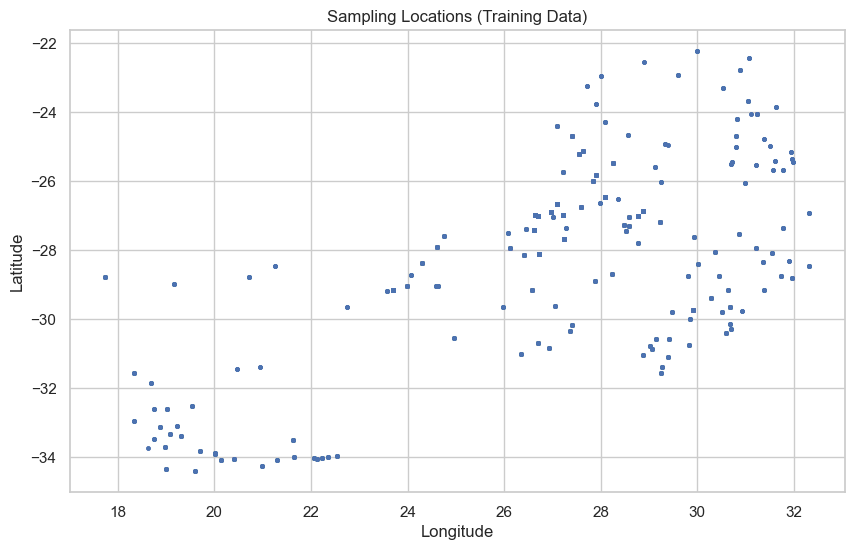

In [18]:
plt.scatter(
    wq["longitude"],
    wq["latitude"],
    s=5,
    alpha=0.5
)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Sampling Locations (Training Data)")
plt.show()

In [ ]:
# Temporal Coverage

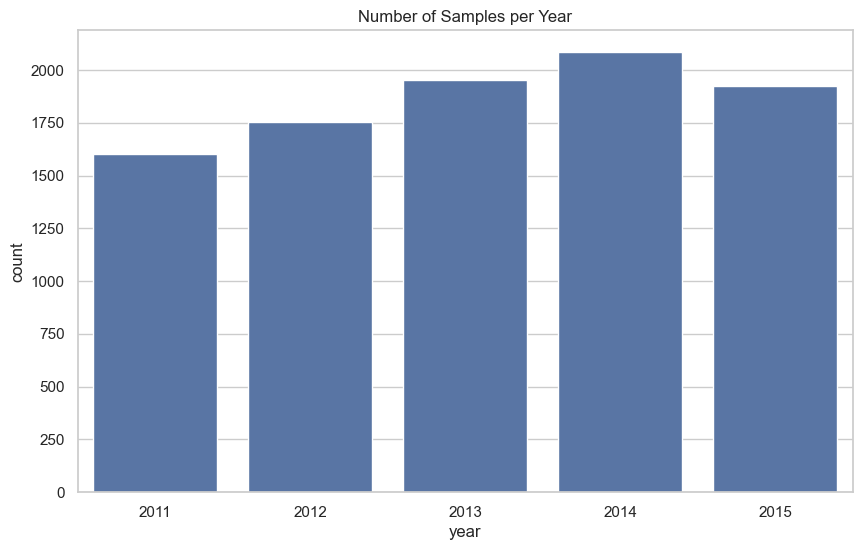

In [19]:
wq["year"] = wq["sample_date"].dt.year

sns.countplot(x="year", data=wq)
plt.title("Number of Samples per Year")
plt.show()

In [ ]:
# target distributions

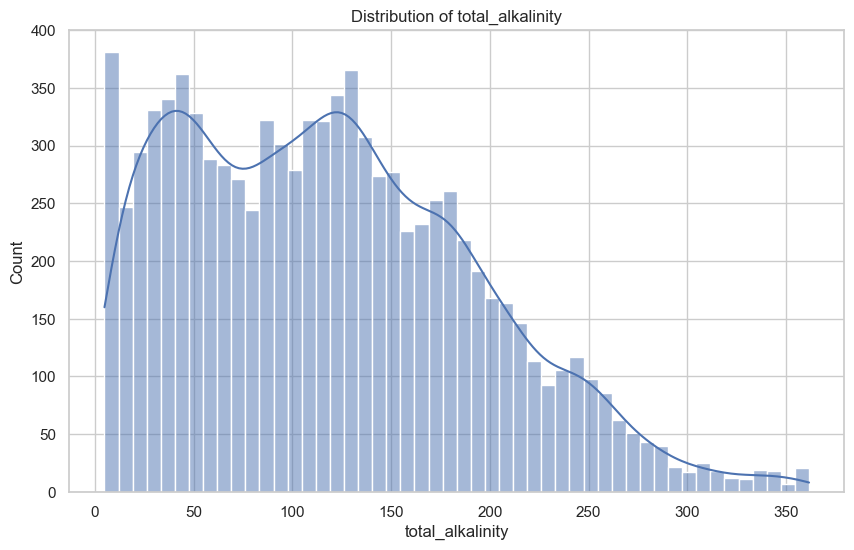

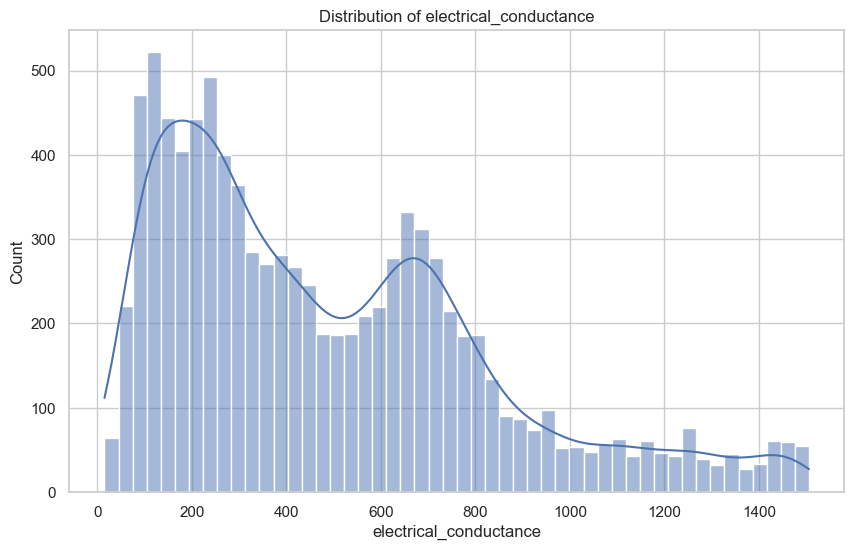

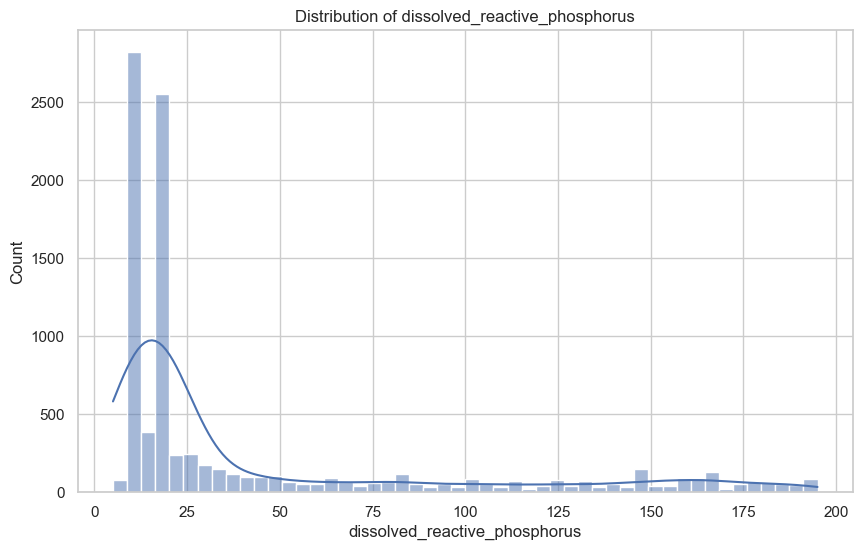

In [20]:
targets = [
    "total_alkalinity",
    "electrical_conductance",
    "dissolved_reactive_phosphorus"
]

for col in targets:
    sns.histplot(wq[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

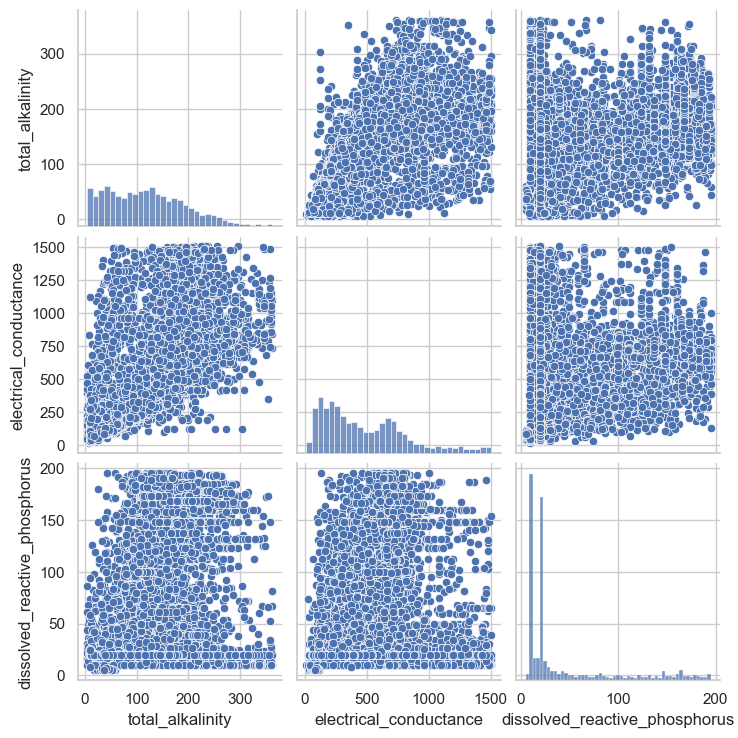

In [21]:
sns.pairplot(wq[targets])
plt.show()

In [23]:
print("WQ columns:", wq.columns.tolist())
print("Landsat columns:", landsat.columns.tolist())
print("TerraClimate columns:", terraclimate.columns.tolist())

WQ columns: ['latitude', 'longitude', 'sample_date', 'total_alkalinity', 'electrical_conductance', 'dissolved_reactive_phosphorus', 'year']
Landsat columns: ['latitude', 'longitude', 'sample_date', 'nir', 'green', 'swir16', 'swir22', 'ndmi', 'mndwi']
TerraClimate columns: ['latitude', 'longitude', 'sample_date', 'pet']


In [24]:
for df in [landsat, terraclimate]:
    df["sample_date"] = pd.to_datetime(
        df["sample_date"],
        dayfirst=True,
        errors="coerce"
    )

In [25]:
landsat.duplicated(
    subset=["latitude", "longitude", "sample_date"]
).sum()

np.int64(0)

In [30]:
keys = ["latitude", "longitude", "sample_date"]

df = (
    wq
    .merge(landsat, on=keys, how="left")
    .merge(terraclimate, on=keys, how="left")
)

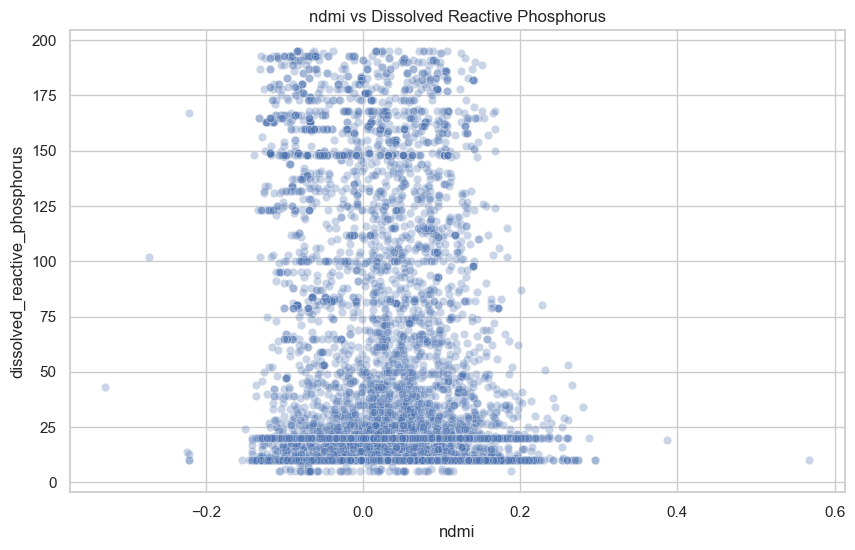

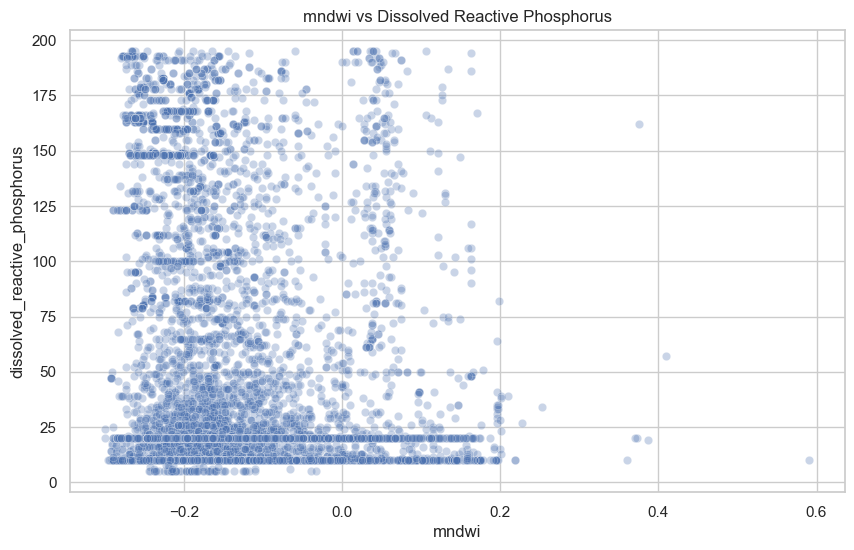

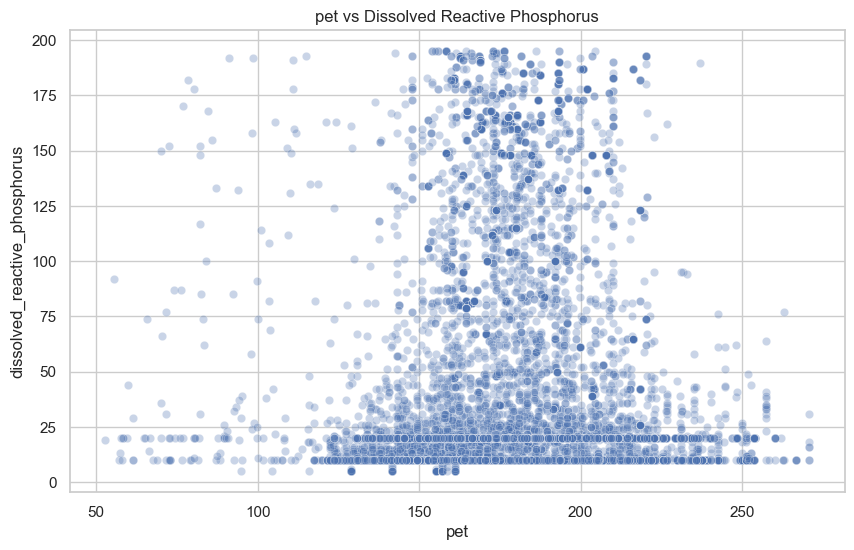

In [32]:
example_features = ["ndmi", "mndwi", "pet"]

for f in example_features:
    if f in df.columns:
        sns.scatterplot(
            x=df[f],
            y=df["dissolved_reactive_phosphorus"],
            alpha=0.3
        )
        plt.title(f"{f} vs Dissolved Reactive Phosphorus")
        plt.show()


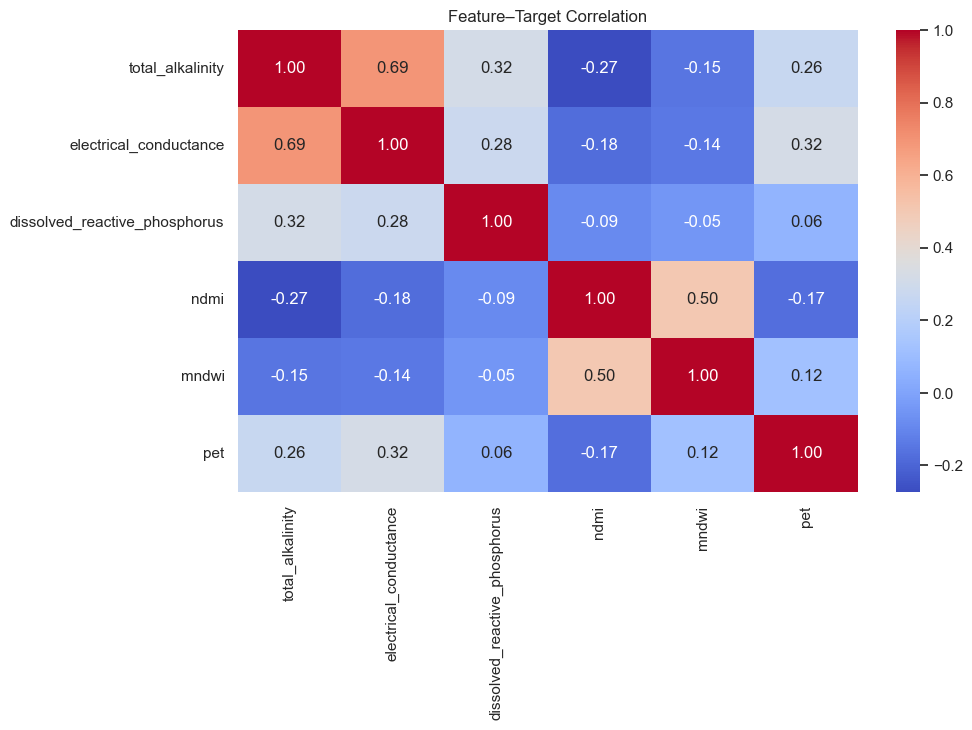

In [33]:
corr_cols = targets + example_features

sns.heatmap(
    df[corr_cols].corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Feature–Target Correlation")
plt.show()